<h1>Statistical data analysis with Pandas and Pingouin (extended)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1:-Create-some-dummy-data-samples" data-toc-modified-id="Exercise-1:-Create-some-dummy-data-samples-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 1: Create some dummy data samples</a></span></li><li><span><a href="#Statistical-signficance-test" data-toc-modified-id="Statistical-signficance-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistical signficance test</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 2</a></span></li><li><span><a href="#Let's-apply-the-analysis-to-real-world-data" data-toc-modified-id="Let's-apply-the-analysis-to-real-world-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Let's apply the analysis to real world data</a></span></li><li><span><a href="#A-few-Pandas-basics" data-toc-modified-id="A-few-Pandas-basics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>A few Pandas basics</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 3</a></span></li><li><span><a href="#Exercise-4:-Extended-real-world-data-example" data-toc-modified-id="Exercise-4:-Extended-real-world-data-example-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 4: Extended real world data example</a></span></li><li><span><a href="#Outlook" data-toc-modified-id="Outlook-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Outlook</a></span></li></ul></div>

This chapter is an extension of the [_Statistical data analysis with Pingouin_](https://www.fabriziomusacchio.com/teaching/python_course/13_pingouin) chapter from the [_Python Basics_](https://www.fabriziomusacchio.com/teaching/python_course/) course. 

We start again from scratch and first create an artificial test data set:

## Exercise 1: Create some dummy data samples

1. Create a new script and define the following [_NumPy_](https://www.fabriziomusacchio.com/teaching/python_course/10_numpy) arrays as dummy data arrays:
```python
np.random.seed(1)
Group_A = np.random.randn(10) * 10 + 5
Group_B = np.random.randn(10) * 10 + 2
```
2. Plot the averages of `Group_A` and `Group_B` in a bar-plot in a new figure window:
    - use the plot command:
    
        `plt.bar([1, 2], ["Mean of Group A", "Mean of Group B"])`. 
       
       Hint: "_Mean of Group A_" and "_Mean of Group B_" are just placeholders! Replace this with the according _NumPy_ averaging command :-)
    - define the x-tick labels via `plt.xticks([1,2], labels=["A", "B"])`
    - add appropriate _x_- and _y_-labels and a title to your plot. 
    - save your plot as a PDF.
3. Plot the values of `Group_A` and `Group_B`, respectively, in a boxplot in another figure window:
    - set the figure aspect ratio to 5x6 via `fig=plt.figure(2, figsize=(5,6))`
    - use the plot command `plt.boxplot([Group_A, Group_B])`
    - define the x-tick labels as in 2.
    - add appropriate _x_- and _y_-labels and a title to your plot. 
    - save your plot as a PDF.
4.  Same as 3., but now use the command `plt.violinplot([Group_A, Group_B], showmedians=True)` to plot a violin plot in another figure.

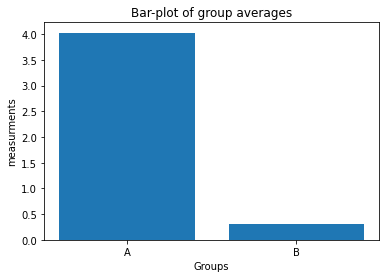

In [2]:
# Your solution 1.1-1.2 here


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 2.1
import numpy as np
import matplotlib.pyplot as plt

# Generate some random dummy data:
np.random.seed(1)
Group_A = np.random.randn(10)*10+5
Group_B = np.random.randn(10)*10+2

# Solution 2.2
fig=plt.figure(1)
fig.clf()

plt.bar([1, 2], [Group_A.mean(), Group_B.mean()])

plt.xticks([1,2], labels=["A", "B"])
plt.xlabel("Groups")
plt.ylabel("measurments")
plt.title("Bar-plot of group averages")

plt.tight_layout
plt.show()
fig.savefig("barplot.pdf", dpi=120)
~~~
</details>

<br>

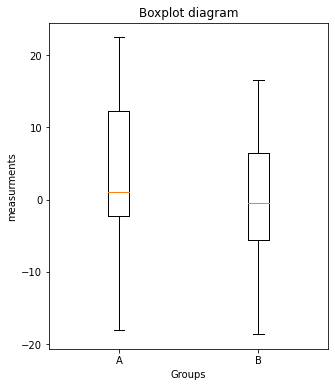

In [3]:
# Your solution 1.3 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 1.3:
fig=plt.figure(3, figsize=(5,6))
fig.clf()

#x_ticks_A = np.ones(len(Group_A))
#x_ticks_B = np.ones(len(Group_B))

plt.boxplot([Group_A, Group_B])

plt.xticks([1,2], labels=["A", "B"])
plt.xlabel("Groups")
plt.ylabel("measurments")
plt.title("Boxplot diagram")

plt.tight_layout
plt.show()
fig.savefig("boxlot.pdf", dpi=120)
~~~
</details>

<br>

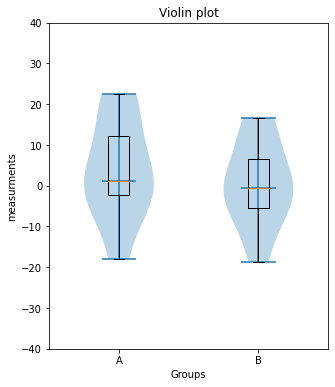

In [4]:
# Your solution 1.4 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 1.4
fig=plt.figure(3, figsize=(5,6))
fig.clf()

#x_ticks_A = np.ones(len(Group_A))
#x_ticks_B = np.ones(len(Group_B))

plt.violinplot([Group_A, Group_B], showmedians=True)
plt.boxplot([Group_A, Group_B])

plt.xticks([1,2], labels=["A", "B"])
plt.xlabel("Groups")
plt.ylabel("measurments")
plt.title("Violin plot")

plt.tight_layout
plt.xlim(0.5, 2.5)
plt.ylim(-40, 40)

plt.show()
fig.savefig("violinplot.pdf", dpi=120)
~~~
</details>

<br>

## Statistical signficance test

We would like to know, whether the difference between the two groups is significant or not. 

To perform a significance test in _Python_ we use [_Pingouin_](https://pingouin-stats.org), a compact package that provides the most important test tools for a significance study. 

![img/pingouin.png](img/pingouin.png)

<div class="alert alert-block alert-info">
<b>Info</b>: It is worth visiting the [_Pingouin_ website](https://pingouin-stats.org). It provides a very good overview of available significance tests and also a decision tree that helps selecting the correct test for the respective data set.
</div>

Screenshots from [pingouin-stats.org/guidelines.html](https://pingouin-stats.org/guidelines.html) (taken on March 2, 2021):
![img/pingouin.png](img/pingouin_1.png)
![img/pingouin.png](img/pingouin_2.png)

Let's assume that our data is normally distributed and the two samples are independent. The corresponding test would be an unpaired, two-sample student's t-test. The corresponding Pingouin command is:

In [6]:
import pingouin as pg
test_result = pg.ttest(Group_A, Group_B, paired=False)
#print(test_result)
pg.ttest(Group_A, Group_B, paired=False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.718772,18,two-sided,0.481509,"[-7.16, 14.61]",0.321445,0.477,0.104604


As we can see, the output of _Pingouin_ is not just a single value, e.g., the p-value, but a table of useful statistical properties:
- `T` : _T_-value
- `p-val` : _p_-value
- `dof` : degrees of freedom
- `cohen-d` : [Cohen's _d_ effect size](https://en.wikipedia.org/wiki/Effect_size)
- `CI95%` : 95% confidence intervals of the difference in means
- `power` : achieved power of the test ( = 1 - type II error)
- `BF10` : Bayes Factor of the alternative hypothesis

To be more correct, this output is actually a so-called [_Pandas_](https://www.fabriziomusacchio.com/teaching/python_course/12_pandas) _DataFrame_, a type of variable construct. _Pandas_ DataFrames are a handy and powerful representation of tables in _Python_, which has - similar to a 2D [_NumPy_](https://www.fabriziomusacchio.com/teaching/python_course/10_numpy) array - rows and columns, that can be directly accessed via their column names, called `key` (similar to the keys of [dictionaries](https://www.fabriziomusacchio.com/teaching/python_course/04_variables#dictionaries)). In very long tables/DataFrames, by default not all columns/keys are shown. To get a list of all available keys, use the following command: `DataFrame.keys()`

In [7]:
# show all keys of the test_result DataFrame:
print(test_result.keys())

Index(['T', 'dof', 'tail', 'p-val', 'CI95%', 'cohen-d', 'BF10', 'power'], dtype='object')


To access a specific column/key, just use the same syntax as for [dictionaries](https://www.fabriziomusacchio.com/teaching/python_course/04_variables#dictionaries) and add `.values` (in order to extract the values from the DataFrame structure and retrieve a _NumPy_ array):

In [7]:
print(f"the p-value of our test is:", 
      f"{test_result['p-val'].values}")

the p-value of our test is: [0.48150881]


## Exercise 2

Add a new cell to the script of the solution from Exercise 1. In the new cell, extend your script by the following functions:
    
1. Write an [_if_-statement](https://www.fabriziomusacchio.com/teaching/python_course/08_if_conditions) that checks whether the p-value of the significance test is lower or greater than 0.05. If the p-value is lower, then print out "_there is a significant difference_" together with the according p-value. Otherwise print out "_no significant difference_", again, together with the according p-value.
2. Extent your _if_-statement, so that also Cohen's _d_ effect size is printed out, but only if the p-value indicates a significant difference.
3. Plug both, the significance test and your written _if_-statement into a function called `normal_unpaired_sigtest(A, B)`, which also returns the p-value back to your main script.
4. In your main script, call your newly created function with the `Group_A` and `Group_B` data.
5. Modify the `Group_A` definition by `Group_A = np.random.randn(10)*10+15` and re-run your script.
6. Create another function for the two-sample, non-parametric, un-paired signficance test:
    - visit [pingouin-stats.org/guidelines.html](https://pingouin-stats.org/guidelines.html) to find the appropriate test
    - copy your function from 2. and rename the copy to `notnormal_unpaired_sigtest(A, B)`
    - adjust the significance test according to your website search result.

In [8]:
# Your solution 2.2 - 2.4:


no significant difference (p-value: [0.48150881])


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 2.2 - 2.4:
def normal_unpaired_sigtest(A, B):
    test_result = pg.ttest(A, B, paired=False)
    p_value = test_result["p-val"].values
    cohen_d = test_result["cohen-d"].values

    if p_value>0.05:
        print(f"no significant difference (p-value: {p_value})")
    else:
        print(f"here is a significant difference "
              f"(p-value: {p_value}, cohen-d:{cohen_d})")

    return p_value

pvalue = normal_unpaired_sigtest(Group_A, Group_B)
~~~
</details>

<br>

In [13]:
# Your solution 2.6 here:


no significant difference (p-value: [0.42735531])


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 2.6:
def notnormal_unpaired_sigtest(A, B):
    test_result = pg.mwu(A, B)
    p_value = test_result["p-val"].values

    if p_value>0.05:
        print(f"no significant difference (p-value: {p_value})")
    else:
        print(f"here is a significant difference "
              f"(p-value: {p_value})")

    return p_value

pvalue = notnormal_unpaired_sigtest(Group_A, Group_B)
~~~
</details>

<details>
<summary><strong>Toggle full code solution</strong></summary>

~~~python
# Solution 2 (full code):
import numpy as np
import matplotlib.pyplot as plt

# %% Generate some random dummy data:
np.random.seed(1)
Group_A = np.random.randn(10)*10+5
Group_B = np.random.randn(10)*10+2
Group_B2= np.random.randn(10)*10+20

# %% FUNCTION DEFINITION
"""not a rule, but usually you place functions at the beginning
   of your script (e.g. after the imports) to a) quickly find 
   them and b) they have to be defined before their first call.
"""

def normal_unpaired_sigtest(A, B):
    test_result = pg.ttest(A, B, paired=False)
    p_value = test_result["p-val"].values
    cohen_d = test_result["cohen-d"].values

    if p_value>0.05:
        print(f"no significant difference (p-value: {p_value})")
    else:
        print(f"here is a significant difference "
              f"(p-value: {p_value}, cohen-d:{cohen_d})")

    return p_value, cohen_d

def notnormal_unpaired_sigtest(A, B):
    test_result = pg.mwu(A, B)
    p_value = test_result["p-val"].values

    if p_value>0.05:
        print(f"no significant difference (p-value: {p_value})")
    else:
        print(f"here is a significant difference "
              f"(p-value: {p_value})")

    return p_value


# %% PLOTS

# BAR-PLOT:
fig=plt.figure(1)
fig.clf()

plt.bar([1, 2], [Group_A.mean(), Group_B.mean()])

plt.xticks([1,2], labels=["A", "B"])
plt.xlabel("Groups")
plt.ylabel("measurments")
plt.title("Bar-plot of group averages")

plt.tight_layout
plt.show()

# VIOLIN-PLOTS:
def my_violin_AB_plot(A, B, A_label="A", B_label="B",
                     title=""):
    """ This is Group A vs Group B Violin plot function.
        Written by me on 2021, April
        
        A     Group A sample data
        B     Group B sample data
        A_label....
    """
    fig=plt.figure(3, figsize=(5,6))
    fig.clf()

    x_ticks_A = np.ones(len(A))
    x_ticks_B = np.ones(len(B))

    plt.violinplot([A, B], showmedians=True)
    plt.boxplot([A, B])
    plt.xticks([1,2], labels=[A_label, B_label])
    plt.xlabel("Groups")
    plt.ylabel("measurments")
    plt.title(title)
    plt.tight_layout
    # plt.ylim(-40, 40)
    
    # some add-on commands (remove some borders):
    axis = plt.gca()
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)
    
    plt.show()

""" OLD:
    fig=plt.figure(3, figsize=(5,6))
    fig.clf()

    x_ticks_A = np.ones(len(Group_A))
    x_ticks_B = np.ones(len(Group_B))

    plt.violinplot([Group_A, Group_B], showmedians=True)
    plt.xticks([1,2], labels=["A", "B"])
    plt.xlabel("Groups")
    plt.ylabel("measurments")
    plt.title("Violin plot")
    plt.tight_layout
    # plt.ylim(-40, 40)
    plt.show()
"""

# Group A vs B:
my_violin_AB_plot(A=Group_A, B=Group_B, A_label="A", B_label="B",
                     title="Group A vs. B")
pvalue_1, cohen_d_1 = normal_unpaired_sigtest(Group_A, Group_B)

# Group A vs B2:
my_violin_AB_plot(A=Group_A, B=Group_B2, A_label="A", 
                     B_label="B 2", title="Group A vs. B2")
pvalue_3, cohen_d_3 = normal_unpaired_sigtest(Group_A, Group_B2)


# SIGNIFICANCE TEST: 
#pvalue_1, cohen_d_1 = normal_unpaired_sigtest(Group_A, Group_B)
#pvalue_2 = notnormal_unpaired_sigtest(Group_A, Group_B)

#pvalue_3, cohen_d_3 = normal_unpaired_sigtest(Group_A, Group_B2)

#print(f"again p-value1: {pvalue_1} and cohen's 1: {cohen_d_1}")
~~~
</details>

<br>

## Let's apply the analysis to real world data

In order to import some data, which are stored in _Excel_ files, we use the [_Pandas_](https://www.fabriziomusacchio.com/teaching/python_course/12_pandas) command `pd.read_excel(path_to_file, index_col=0)`:

In [13]:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

# Define file paths:
file_path = "Data/Pandas_1/"  

""" file_path is the main root path. 
    
    The definition above is a so-called relative file path -
    relative from the folder, that contains the script you 
    are currently executing.
    
    A so-called absolute path (and therefore indepenent from
    your script's folder) can be defined as follows:
    
    file_path = "/Users/Fabrizio/Python/Kurs/Data/Pandas_1/"
    
    or
    
    file_path = "C:/Users/Fabrizio/Python/Kurs/Data/Pandas_1/"
    
    (adjust this to the absolute path on YOUR machine!)
"""

file_name_1 = "Group_A_data.xls"
file_name_2 = "Group_B_data.xls"
  
file_1 = os.path.join(file_path, file_name_1) 
#  actually it does: file_1 = file_path + file_name_1
file_2 = os.path.join(file_path, file_name_2)

""" The os.path.join() command just sticks the different 
    file-path components together. You can also just write:
    
    file_1 = file_path + file_name_1
    file_2 = file_path + file_name_2
    
    Never forget to put the requiered '/' at the end of 
    the file_path defintion::
       
       file_path = "Data/Pandas_1/"  ⟵ okay
       file_path = "Data/Pandas_1"   ⟵ not okay
"""

# Read the Excel files with Pandas into a Pandas Dataframe:
Group_A_df = pd.read_excel(file_1, index_col=0)
Group_B_df = pd.read_excel(file_2, index_col=0)

# some print test:
Group_A_df.iloc[0:10] # with the iloc command we can access
                      # DataFrame rows by standard indexing and
                      # slicing rules. Here, we didn't want to
                      # print out all rows of the DataFrame.
#print(Group_A_df.iloc[0:10])

,Data
0,18.074201
1,13.086849
2,2.272670
3,20.283832
4,26.357661
5,45.342706
6,47.139108
7,1.427794
8,7.846927
9,26.665037


The two _Excel_ files are imported as DataFrames into `Group_A_df` and `Group_B_df`, respectively. In the next step, we extract the DataFrame data into two _NumPy_ arrays:

In [14]:
# Extracting the DataFrame import data:
Group_A = Group_A_df["Data"].values
Group_B = Group_B_df["Data"].values

## A few Pandas basics
As stated in the [introductory course](https://www.fabriziomusacchio.com/teaching/python_course/12_pandas), _Pandas_ can do much more than _Excle_ file reading. The _Pandas_ DataFrame comes - simialar to [_NumPy_](https://www.fabriziomusacchio.com/teaching/python_course/10_numpy#useful-helper-functions-for-array-generation) -  equipped with a bunch of useful built-in function:

In [13]:
print(f"shape of Group A data: {Group_A_df.shape}")
print(f"shape of Group B data: {Group_B_df.shape}")

shape of Group A data: (50, 1)
shape of Group B data: (50, 1)


We see that the data of our two groups is one-dimensional, and

In [14]:
print(f"keys (columns) in Group A data: {Group_A_df.keys()}")
print(f"keys (columns) in Group B data: {Group_B_df.keys()}")

keys (columns) in Group A data: Index(['Data'], dtype='object')
keys (columns) in Group B data: Index(['Data'], dtype='object')


the main (and only - take a look at the Excel files-) column's key-name is "_Data_".
 
 We can do some further first examination of our data:

In [15]:
print(f"first 5 rows in Group A data: {Group_A_df.head(5)}")

first 5 rows in Group A data:         Data
0  18.074201
1  13.086849
2   2.272670
3  20.283832
4  26.357661


In [16]:
print(f"last 5 rows in Group A data: {Group_A_df.tail(5)}")

last 5 rows in Group A data:          Data
45  24.808727
46   9.782053
47   2.438080
48  31.641609
49  24.247804


In [17]:
print(f"average of Group A data: {Group_A_df.mean().values}",
      f"+/- {Group_A_df.std().values}",)
print(f"average of Group B data: {Group_B_df.mean().values}",
      f"+/- {Group_B_df.std().values}",)

average of Group A data: [17.47999084] +/- [14.40494573]
average of Group B data: [14.43276578] +/- [11.85600989]


In [94]:
# general descriptive statistis of your dataframe:
Group_A_df.describe()

,Data
count,50.000000
mean,17.479991
std,14.404946
min,0.922640
25%,7.307007
50%,13.226441
75%,26.161001
max,60.000000


## Exercise 3

1. Copy your script from the _Pingouin_ Exercise 2. 
2. Add the _Pandas_ _Excel_ file import commands from above to your script. 
3. Uncomment or redefine your `Group_A` and `Groud_B` variable definitions by the following expression:
    ```python
        Group_A = Group_A_df["Data"].values
        Group_B = Group_B_df["Data"].values
    ```
4. Run your new script. 
5. Now, instead of reading the file "Group_B_data.xls", read "Group_B2_data.xls" as Group B data and re-run your script

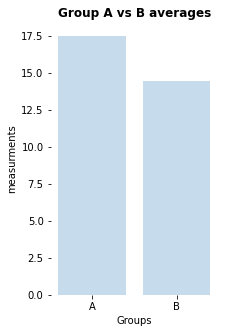

<Figure size 432x288 with 0 Axes>

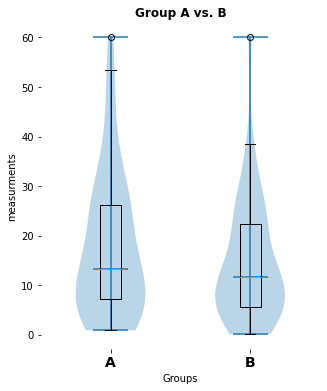

no significant difference (p-value: [0.25092508])


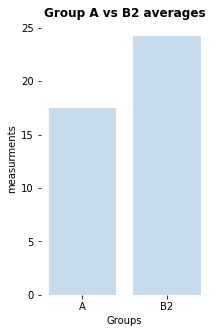

<Figure size 432x288 with 0 Axes>

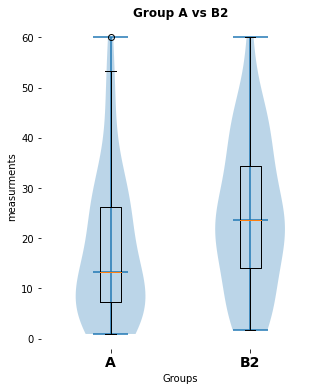

here is a significant difference (p-value: [0.02157014], cohen-d:[0.46704775])


In [2]:
# Your solution 3 here (full script):


<details>
<summary><strong>Toggle full script solution</strong></summary>

~~~python
# Solution 3 (Full script):
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

# Define file paths:
file_path = "Data/Pandas_1/"     
file_name_1 = "Group_A_data.xls"
file_name_2 = "Group_B_data.xls"
file_name_3 = "Group_B2_data.xls"

file_1 = os.path.join(file_path, file_name_1)
file_2 = os.path.join(file_path, file_name_2)
file_3 = os.path.join(file_path, file_name_3)

# Read the Excel files with Pandas into a Pandas Dataframe:
Group_A_df = pd.read_excel(file_1, index_col=0)
Group_B_df = pd.read_excel(file_2, index_col=0)
Group_B2_df= pd.read_excel(file_3, index_col=0)

# Broadcast the DataFrame data into the appropriate variables:
Group_A = Group_A_df["Data"].values
Group_B = Group_B_df["Data"].values
Group_B2= Group_B2_df["Data"].values


""" The following code is simply your copied solution from the 
    Pingouin section:
"""

# %% FUNCTION DEFINITIONS
def normal_unpaired_sigtest(A, B):
    test_result = pg.ttest(A, B, paired=False)
    p_value = test_result["p-val"].values
    cohen_d = test_result["cohen-d"].values

    if p_value>0.05:
        print(f"no significant difference (p-value: {p_value})")
    else:
        print(f"here is a significant difference "
              f"(p-value: {p_value}, cohen-d:{cohen_d})")

    return p_value, cohen_d

def notnormal_unpaired_sigtest(A, B):
    test_result = pg.mwu(A, B)
    p_value = test_result["p-val"].values

    if p_value>0.05:
        print(f"no significant difference (p-value: {p_value})")
    else:
        print(f"here is a significant difference "
              f"(p-value: {p_value})")

    return p_value

# VIOLIN-PLOTS:
def my_violin_AB_plot(A, B, A_label="A", B_label="B",
                     title=""):
    """ This is Group A vs Group B Violin plot function.
        Written by me on 2021, April
        
        A     Group A sample data
        B     Group B sample data
        A_label....
    """
    fig=plt.figure(3, figsize=(5,6))
    fig.clf()

    x_ticks_A = np.ones(len(A))
    x_ticks_B = np.ones(len(B))

    plt.violinplot([A, B], showmedians=True)
    plt.boxplot([A, B])
    
    plt.xticks([1,2], labels=[A_label, B_label], fontsize=14,
              fontweight="bold")
    plt.xlabel("Groups")
    plt.ylabel("measurments")
    plt.title(title, fontweight="bold")
    plt.tight_layout
    # plt.ylim(-40, 40)
    
    # some add-on commands (remove some borders):
    axis = plt.gca()
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)
    
    plt.show()

# BAR-PLOT:
def my_bar_AB_plot(A, B, A_label="A", B_label="B", title="",
                  plotfilename="plot.pdf"):
    fig=plt.figure(1, figsize=(3,5))
    fig.clf()

    plt.bar([1, 2], [A.mean(), B.mean()], alpha=0.25)

    plt.xticks([1,2], labels=[A_label, B_label])
    plt.xlabel("Groups")
    plt.ylabel("measurments")
    #plt.title("Bar-plot of group averages")
    plt.title(title, fontweight="bold")
    
    # some add-on commands (remove some borders):
    axis = plt.gca()
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)

    plt.tight_layout
    plt.show()
    # eg here the plot-save commands:
    plt.savefig(plotfilename)# please wait for check up.



# %% STATISTICAL ANALYSIS AND PLOT:
""" Please note, that the followin 3 commands per group 
    comparison has become the MAIN PART OF OUR ANALYSIS
    script, i.e., only execute these three commands to 
    get your plots and significance test. How the sign-
    ficance test is calculated and how the plots are 
    generated is done in our function, which we don't have 
    to touch, change and care about anymore.
"""

# Group A vs B:
my_bar_AB_plot(A=Group_A, B=Group_B, A_label="A", B_label="B", 
               title="Group A vs B averages",
              plotfilename="bar_plot_AB.pdf")
my_violin_AB_plot(A=Group_A, B=Group_B, A_label="A", B_label="B",
                     title="Group A vs. B")
pvalue_1, cohen_d_1 = normal_unpaired_sigtest(Group_A, Group_B)


# Group A vs B2:
my_bar_AB_plot(A=Group_A, B=Group_B2, A_label="A", B_label="B2", 
               title="Group A vs B2 averages",
              plotfilename="bar_plot_AB2.pdf")
my_violin_AB_plot(A=Group_A, B=Group_B2, A_label="A", 
                  B_label="B2", title="Group A vs B2")
pvalue_3, cohen_d_3 = normal_unpaired_sigtest(Group_A, Group_B2)
~~~
</details>

<br>

## Exercise 4: Extended real world data example
In the second part of our statistics tutorial we expand our script, so that it can analyse _Excel_ tables with more than just one column. Also, we work with `.xlsx` files instead of `.xls` files. Unfortuantely, I just discovered that `xlrd` has explicitly removed the support for anything other than `.xls` files (due to "_potential security vulnerabilities_", [source](https://stackoverflow.com/questions/65250207/pandas-cannot-open-an-excel-xlsx-file)). To overcome this problem, please install the 

* `openpyxl`

package. 

1. Copy the _Excel_ file reading part from your previous script (or copy it from "Solution 3 (Full script)") into a new script.
2. Change the main data path to `Data/Pandas_3/` and adjust the file names to the Group A and Group B data in that folder.
3. In order to be able to read `.xlsx` files, add the argument `engine='openpyxl` to the _Pandas_ read command, e.g.
    ```python
    pd.read_excel(file_1, index_col=0, engine='openpyxl')
    ```
4. Similar to dictionaries, print out all column names ("`keys`") of the read _Excel_ files, e.g.:
    ```python
    for key in Group_A_df.keys():
        print(f"{key}")
    ```

In [18]:
# Your solution 4.1-4.4 here:


Mouse 1
Mouse 2
Mouse 3
Mouse 4
Mouse 5
Mouse 6
Mouse 7
Mouse 8
Mouse 9
Mouse 10


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

# Define file paths:
file_path = "Data/Pandas_3/"
#file_name_1 = "Group_A_data_2.xlsx"
#file_name_2 = "Group_B_data_2.xlsx"
file_name_1 = "Group_A_data.xlsx"
file_name_2 = "Group_B_data.xlsx"

file_1 = os.path.join(file_path, file_name_1)
file_2 = os.path.join(file_path, file_name_2)

# Read the Excel files with Pandas into a Pandas Dataframe:
Group_A_df = pd.read_excel(file_1, index_col=0, engine='openpyxl')
Group_B_df = pd.read_excel(file_2, index_col=0, engine='openpyxl')

for column in Group_A_df.keys():
    print(f"{column}")
~~~
</details>

<br>

In [19]:
Group_A_df.keys()

Index(['Mouse 1', 'Mouse 2', 'Mouse 3', 'Mouse 4', 'Mouse 5', 'Mouse 6',
       'Mouse 7', 'Mouse 8', 'Mouse 9', 'Mouse 10'],
      dtype='object')

In [20]:
Group_A_df.head(7)

,Mouse 1,Mouse 2,Mouse 3,Mouse 4,Mouse 5,Mouse 6,Mouse 7,Mouse 8,Mouse 9,Mouse 10
0,18.074201,23.066936,60.000000,20.711322,60.000000,28.763525,42.427278,15.598740,13.465411,13.196517
1,13.086849,10.323111,19.974086,38.248952,25.587832,53.735452,16.635397,16.495615,44.782381,23.109105
2,2.272670,17.602005,22.705996,19.140288,24.739332,12.594575,41.966899,13.633330,25.891547,14.908281
3,20.283832,28.179423,36.580909,38.064844,29.033290,9.057918,60.000000,20.301198,18.622461,13.755511
4,26.357661,60.000000,29.650851,20.149923,44.583438,5.217009,48.860477,37.083126,18.306000,9.591119
5,45.342706,9.259463,10.029454,35.167710,14.413221,26.552184,3.281541,9.668325,15.764203,19.503650
6,47.139108,25.335681,10.954845,19.216845,45.489924,48.642575,26.566834,3.103062,12.845208,34.832844


In [2]:
print(Group_A_df.shape)

(50, 10)


In [8]:
#print(Group_A_df.describe())
Group_A_df.describe()

,Mouse 1,Mouse 2,Mouse 3,Mouse 4,Mouse 5,Mouse 6,Mouse 7,Mouse 8,Mouse 9,Mouse 10
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,17.479991,24.648196,27.360234,26.124974,28.200733,18.042231,21.736532,18.573062,26.391034,24.842926
std,14.404946,14.363733,12.986157,11.570712,11.908364,13.552271,15.680920,13.948133,12.477335,12.394661
min,0.922640,9.259463,9.270425,9.429189,9.777123,0.062906,0.376473,0.472434,9.382286,9.549946
25%,7.307007,13.435652,19.699324,18.230936,18.421391,7.620068,7.607388,7.634176,17.837596,14.267775
50%,13.226441,19.900726,24.955239,24.172694,26.158784,14.903794,18.857441,16.047178,23.196840,23.064810
75%,26.161001,28.072406,33.454855,32.736302,34.073416,27.297384,35.213392,26.562242,34.536572,31.782738
max,60.000000,60.000000,60.000000,60.000000,60.000000,53.735452,60.000000,56.025684,60.000000,60.000000


**Exercise 4 continued**:

5. Calculate and print the median of each column of each data table. Hint: Take a look, how we calculated the mean with the built-in _Pandas_ mean function shown in Section 5.
6. Save the calculated medians into the variables `Group_A` and `Group_B`.
7. Copy the remaining plot and analysis part from your previous script/"Solution 3 (Full script)" into your  script and run your pipeline.
8. Re-run your script with the Group A2 and Group B2 data.

In [21]:
# Your solution 4.5-4.6 here:


Group A medians: [13.22644106 19.90072561 24.95523869 24.17269392 26.15878378 14.9037943
 18.85744129 16.04717778 23.19683969 23.06480993]
Group B medians: [23.59495388 11.61376136 18.68395653 20.8270858  21.82640825 14.64554514
 20.27448066 17.02615332 11.41902818 17.77334372]


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 4.5-4.6:
Group_A = Group_A_df.median().values
Group_B = Group_B_df.median().values
print(f"Group A medians: {Group_A}")
print(f"Group B medians: {Group_B}")
~~~
</details>

<br>

In [13]:
print(f"{type(Group_A_df)}")
print(f"{type(Group_A)}")

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [14]:
dummy = Group_A_df.values
print(f"{type(dummy)}")
print(f"{dummy.shape}")

<class 'numpy.ndarray'>
(50, 10)


In [16]:
# the other way around: create a new dataframe from a given
# NumPy array:
df2 = pd.DataFrame(data=dummy)
df2

,0,1,2,3,4,5,6,7,8,9
0,18.074201,23.066936,60.000000,20.711322,60.000000,28.763525,42.427278,15.598740,13.465411,13.196517
1,13.086849,10.323111,19.974086,38.248952,25.587832,53.735452,16.635397,16.495615,44.782381,23.109105
2,2.272670,17.602005,22.705996,19.140288,24.739332,12.594575,41.966899,13.633330,25.891547,14.908281
3,20.283832,28.179423,36.580909,38.064844,29.033290,9.057918,60.000000,20.301198,18.622461,13.755511
4,26.357661,60.000000,29.650851,20.149923,44.583438,5.217009,48.860477,37.083126,18.306000,9.591119
5,45.342706,9.259463,10.029454,35.167710,14.413221,26.552184,3.281541,9.668325,15.764203,19.503650
6,47.139108,25.335681,10.954845,19.216845,45.489924,48.642575,26.566834,3.103062,12.845208,34.832844
7,1.427794,12.321790,31.902779,18.709343,22.324181,13.551915,20.291572,28.838343,41.150187,42.268679
8,7.846927,60.000000,26.200162,26.720212,19.633351,31.817556,33.593050,2.118014,40.808585,24.551126
9,26.665037,14.995325,20.649107,25.755907,18.867057,10.498226,2.170260,3.044227,13.793600,14.054273


In [18]:
df2.to_csv("Data/outcsv_df2.csv")
# there is also an Excel export. But I have to look it up (one
# needs an "ExcelWriter" module)

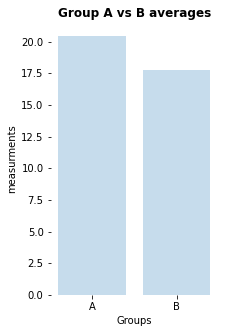

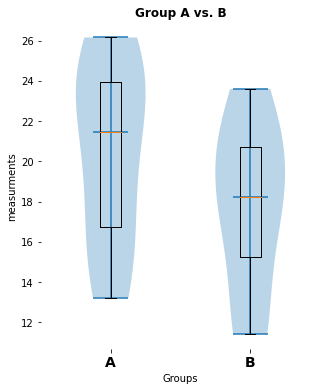

no significant difference (p-value: [0.1858791])


In [22]:
# Your solution 4.7-4.8 here:


<details>
<summary><strong>Toggle solution</strong></summary>

~~~python
# Solution 4.7-4.8:

# %% FUNCTION DEFINITIONS
def normal_unpaired_sigtest(A, B):
    test_result = pg.ttest(A, B, paired=False)
    p_value = test_result["p-val"].values
    cohen_d = test_result["cohen-d"].values

    if p_value>0.05:
        print(f"no significant difference (p-value: {p_value})")
    else:
        print(f"here is a significant difference "
              f"(p-value: {p_value}, cohen-d:{cohen_d})")

    return p_value, cohen_d

def notnormal_unpaired_sigtest(A, B):
    test_result = pg.mwu(A, B)
    p_value = test_result["p-val"].values

    if p_value>0.05:
        print(f"no significant difference (p-value: {p_value})")
    else:
        print(f"here is a significant difference "
              f"(p-value: {p_value})")

    return p_value

# VIOLIN-PLOTS:
def my_violin_AB_plot(A, B, A_label="A", B_label="B",
                     title=""):
    """ This is Group A vs Group B Violin plot function.
        Written by me on 2021, April
        
        A     Group A sample data
        B     Group B sample data
        A_label....
    """
    fig=plt.figure(3, figsize=(5,6))
    fig.clf()

    x_ticks_A = np.ones(len(A))
    x_ticks_B = np.ones(len(B))

    plt.violinplot([A, B], showmedians=True)
    plt.boxplot([A, B])
    
    plt.xticks([1,2], labels=[A_label, B_label], fontsize=14,
              fontweight="bold")
    plt.xlabel("Groups")
    plt.ylabel("measurments")
    plt.title(title, fontweight="bold")
    plt.tight_layout
    # plt.ylim(-40, 40)
    
    # some add-on commands (remove some borders):
    axis = plt.gca()
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)
    
    plt.show()

# BAR-PLOT:
def my_bar_AB_plot(A, B, A_label="A", B_label="B", title=""):
    fig=plt.figure(1, figsize=(3,5))
    fig.clf()

    plt.bar([1, 2], [A.mean(), B.mean()], alpha=0.25)

    plt.xticks([1,2], labels=[A_label, B_label])
    plt.xlabel("Groups")
    plt.ylabel("measurments")
    #plt.title("Bar-plot of group averages")
    plt.title(title, fontweight="bold")
    
    # some add-on commands (remove some borders):
    axis = plt.gca()
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)

    plt.tight_layout
    plt.show()



# %% STATISTICAL ANALYSIS AND PLOT:
""" Please note, that the followin 3 commands per group 
    comparison has become the MAIN PART OF OUR ANALYSIS
    script, i.e., only execute these three commands to 
    get your plots and significance test. How the sign-
    ficance test is calculated and how the plots are 
    generated is done in our function, which we don't have 
    to touch, change and care about anymore.
"""

# Group A vs B:
my_bar_AB_plot(A=Group_A, B=Group_B, A_label="A", B_label="B", 
               title="Group A vs B averages")
my_violin_AB_plot(A=Group_A, B=Group_B, A_label="A", B_label="B",
                     title="Group A vs. B")
pvalue_1, cohen_d_1 = normal_unpaired_sigtest(Group_A, Group_B)
~~~
</details>

<br>

## Outlook
We can also easily and quickly plot all data columns of an _Excel_ file via:

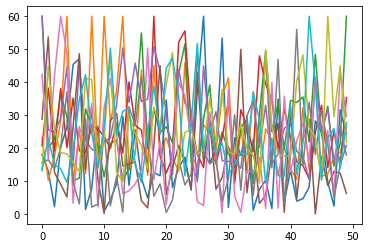

In [23]:
# Matplotlib:
plt.plot(Group_A_df)

<AxesSubplot:>

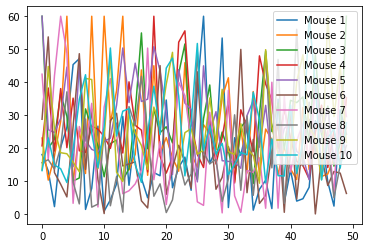

In [24]:
# or use the Pandas built-in plot function:
Group_A_df.plot()

Also, we can easily plot the _Grand_ average over all columns via:

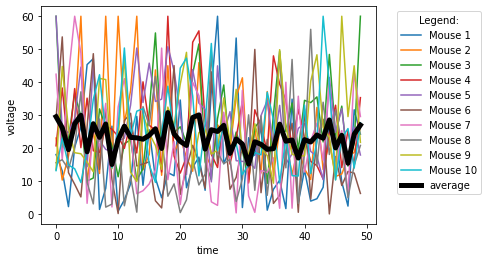

In [25]:
#Group_A_df.plot()
Group_A_df.plot(xlabel="time", ylabel="voltage")
#Group_A_df.mean(axis=1).plot()
Group_A_df.mean(axis=1).plot(lw=5, c="k", label="average")
plt.legend(loc="best",bbox_to_anchor=(1.05, 1), title="Legend:")